In [1]:
import pymongo
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from pymongo import MongoClient


In [2]:
cluster = MongoClient("mongodb://analyticslab-cosmosdb-dev:b9LZFoiyld9Bw1wxHzqKlx783zzvuex2xzePh7pS3y21UHVFbn7C15bsyqfCthE139hraUyTTSPYce0JrxNSVA%3D%3D@analyticslab-cosmosdb-dev.mongo.cosmos.azure.com:10255/?ssl=true&replicaSet=globaldb&retrywrites=false&maxIdleTimeMS=120000&appName=@analyticslab-cosmosdb-dev@")

First we take drivers from cc-all-data

In [3]:
db = cluster["cpfo-data"]
collection = db["cc-all-data"]

In [4]:
results= collection.find({"datapoint_name": "Ethanol US"})
results_list=list(results)
df1=pd.DataFrame(results_list)
df1=df1[['date', 'value']]
df1=df1.rename(columns={'value': 'Ethanol US'})

In [5]:
results= collection.find({"datapoint_name": "USD/INR exchange rate"})
results_list=list(results)
df2=pd.DataFrame(results_list)
df2=df2[['date', 'value']]
df2=df2.rename(columns={'value': 'USD/INR exchange rate'})

In [6]:
results= collection.find({"datapoint_name": "Ethanol Europe"})
results_list=list(results)
df3=pd.DataFrame(results_list)
df3=df3[['date', 'value']]
df3=df3.rename(columns={'value': 'Ethanol Europe'})

In [7]:
results= collection.find({"datapoint_name": "Federal funds rate"})
results_list=list(results)
df4=pd.DataFrame(results_list)
df4=df4[['date', 'value']]
df4=df4.rename(columns={'value': 'Federal funds rate'})

In [8]:
results= collection.find({"datapoint_name": "Ethanol Futures CLOSE"})
results_list=list(results)
df5=pd.DataFrame(results_list)
df5=df5[['date', 'value']]
df5=df5.rename(columns={'value': 'Ethanol Futures CLOSE'})

In [9]:
results= collection.find({"datapoint_name": "CBOE Volatility Index (VIX) CLOSE"})
results_list=list(results)
df6=pd.DataFrame(results_list)
df6=df6[['date', 'value']]
df6=df6.rename(columns={'value': 'CBOE Volatility Index (VIX) CLOSE'})

In [10]:
results= collection.find({"datapoint_name": "India Inflation data Core CPI"})
results_list=list(results)
df7=pd.DataFrame(results_list)
df7=df7[['date', 'value']]
df7=df7.rename(columns={'value': 'India Inflation data Core CPI'})

In [11]:
results= collection.find({"datapoint_name": "USD / Brazilian Real Rate"})
results_list=list(results)
df8=pd.DataFrame(results_list)
df8=df8[['date', 'value']]
df8=df8.rename(columns={'value': 'USD / Brazilian Real Rate'})

In [12]:
results= collection.find({"datapoint_name": "ICEUS Sugar #11 CLOSE"})
results_list=list(results)
df9=pd.DataFrame(results_list)
df9=df9[['date', 'value']]
df9=df9.rename(columns={'value': 'ICEUS Sugar #11 CLOSE'})

In [13]:
cc=pd.merge(df1, df2,on='date')
cc=pd.merge(cc, df3, on='date')
cc=pd.merge(cc, df4, on='date')
cc=pd.merge(cc, df6,on='date')
cc=pd.merge(cc, df7, on='date')
cc=pd.merge(cc, df8, on='date')
cc=pd.merge(cc, df9, on='date')

In [14]:
cc

,date,Ethanol US,USD/INR exchange rate,Ethanol Europe,Federal funds rate,CBOE Volatility Index (VIX) CLOSE,India Inflation data Core CPI,USD / Brazilian Real Rate,ICEUS Sugar #11 CLOSE
0,2023-03-21,0.60,82.68,0.84,4.58,21.38,6.44,5.24,20.48
1,2023-03-24,0.62,82.35,0.84,4.83,21.74,6.44,5.25,20.89
2,2023-03-27,0.62,82.35,0.83,4.83,20.60,6.44,5.20,20.89
3,2023-03-28,0.62,82.16,0.83,4.83,19.97,6.44,5.17,20.89
4,2023-03-29,0.61,82.24,0.84,4.83,19.12,6.44,5.14,21.25
...,...,...,...,...,...,...,...,...,...
322,2024-06-08,0.52,83.52,0.72,5.33,12.22,4.83,5.34,19.00
323,2024-06-09,0.52,83.52,0.72,5.33,12.22,4.83,5.34,19.00
324,2024-06-10,0.51,83.52,0.73,5.33,12.74,4.83,5.35,18.63
325,2024-06-11,0.52,83.60,0.73,5.33,12.85,4.83,5.37,18.79


In [15]:
correlation_matrix = cc.corr()

<Axes: >

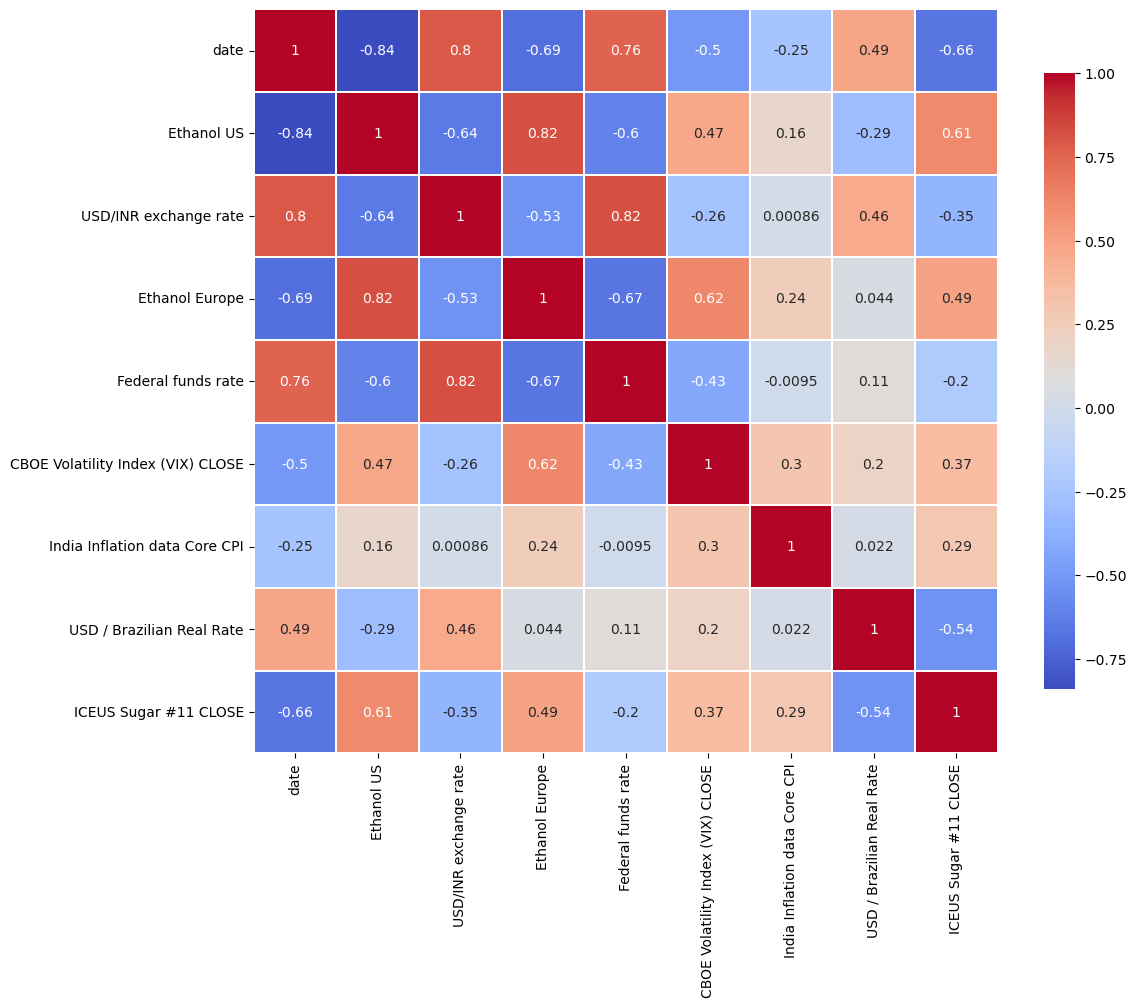

In [16]:
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',linewidths=0.1, square=True, cbar_kws={"shrink": .8})

In [17]:
sq_corr1=correlation_matrix.iloc[-1]**2
average_corr1=sq_corr1.mean()
average_corr1

0.3021945252638215

In [18]:
#SUGAR ICE IRRELEVANT DRIVERS
#Ethanol Brazil
#US Dollar Index CLOSE (or HIGH OPEN LOW)
#Brent crude oil CLOSE (or HIGH OPEN LOW) ~ ~ only about 0.1 correlation
#WTI crude oil CLOSE (or HIGH OPEN LOW) ~ only about 0.1 correlation
#Hydrous Ethanol Futures CLOSE

In [19]:
#SUGAR ICE RELEVANT DRIVERS
#Ethanol US (+ve)
#USD/INR exchange rate (-ve)
#Ethanol Europe (+ve)
#Ethanol Futures CLOSE (+ve)
#CBOE Volatility Index (VIX) CLOSE (+ve)
#India Inflation data Core CPI
#USD / Brazilian Real Rate (-ve)

In [20]:
cc.set_index('date', inplace=True)

In [21]:
# scaler=StandardScaler()
# cc[cc.columns[1:]]=scaler.fit_transform(cc[cc.columns[1:]])

In [22]:
# plt.figure(figsize=(10, 8))
# plt.plot(cc.index, cc['ICEUS Sugar #11 CLOSE'], label='ICEUS Sugar #11 CLOSE')
# # #plt.plot(cc.index, cc['Ethanol US'], label='Ethanol US')
# # #plt.plot(cc.index, cc['USD/INR exchange rate'], label='USD/INR exchange rate')
# # #plt.plot(cc.index, cc['Ethanol Europe'], label='Ethanol Europe')
# # #plt.plot(cc.index, cc['Ethanol Futures CLOSE'], label='Ethanol Futures CLOSE')
# # #plt.plot(cc.index, cc['CBOE Volatility Index (VIX) CLOSE'], label='CBOE Volatility Index (VIX) CLOSE')
# plt.plot(cc.index, cc['USD / Brazilian Real Rate'], label='USD / Brazilian Real Rate')
# # plt.plot(cc.index, cc['India Inflation data Core CPI'], label='India Inflation data Core CPI')
# plt.legend()
# plt.xlabel('Date')
# plt.ylabel('Values')

Now we take drivers from ceicdata-all-commodities

In [23]:
collection2=db['ceicdata-all-commodities']

In [24]:
results= collection2.find({"datapoint_id": "449467297"})
results_list=list(results)
df1=pd.DataFrame(results_list)
name=df1['datapoint_name'][0]
df1=df1[['date', 'value']]
df1=df1.rename(columns={'value': name})

In [25]:
results= collection2.find({"datapoint_id": "408949517"})
results_list=list(results)
df2=pd.DataFrame(results_list)
name=df2['datapoint_name'][0]
df2=df2[['date', 'value']]
df2=df2.rename(columns={'value': name})

In [26]:
results= collection2.find({"datapoint_id": "455409917"})
results_list=list(results)
df3=pd.DataFrame(results_list)
name=df3['datapoint_name'][0]
df3=df3[['date', 'value']]
df3=df3.rename(columns={'value': name})

In [27]:
results= collection2.find({"datapoint_id": "194091602"})
results_list=list(results)
df4=pd.DataFrame(results_list)
name=df4['datapoint_name'][0]
df4=df4[['date', 'value']]
df4=df4.rename(columns={'value': name})

In [28]:
results= collection2.find({"datapoint_id": "81382801"})
results_list=list(results)
df5=pd.DataFrame(results_list)
name=df5['datapoint_name'][0]
df5=df5[['date', 'value']]
df5=df5.rename(columns={'value': name})

In [29]:
results= collection2.find({"datapoint_id": "40782001"})
results_list=list(results)
df6=pd.DataFrame(results_list)
name=df6['datapoint_name'][0]
df6=df6[['date', 'value']]
df6=df6.rename(columns={'value': name})

In [30]:
results= collection2.find({"datapoint_id": "365307217"})
results_list=list(results)
df6=pd.DataFrame(results_list)
name=df6['datapoint_name'][0]
df6=df6[['date', 'value']]
df6=df6.rename(columns={'value': name})

In [31]:
results= collection2.find({"datapoint_id": "480877897"})
results_list=list(results)
df7=pd.DataFrame(results_list)
name=df7['datapoint_name'][0]
df7=df7[['date', 'value']]
df7=df7.rename(columns={'value': name})

In [32]:
results= collection2.find({"datapoint_id": "97684401"})
results_list=list(results)
df8=pd.DataFrame(results_list)
name=df8['datapoint_name'][0]
df8=df8[['date', 'value']]
df8=df8.rename(columns={'value': name})

In [33]:
results= collection2.find({"datapoint_id": "449471917"})
results_list=list(results)
df9=pd.DataFrame(results_list)
name=df9['datapoint_name'][0]
df9=df9[['date', 'value']]
df9=df9.rename(columns={'value': name})

In [34]:
results= collection2.find({"datapoint_id": "94664701"})
results_list=list(results)
df10=pd.DataFrame(results_list)
name=df10['datapoint_name'][0]
df10=df10[['date', 'value']]
df10=df10.rename(columns={'value': name})

In [35]:
results= collection.find({"datapoint_name": "ICEUS Sugar #11 CLOSE"})
results_list=list(results)
df11=pd.DataFrame(results_list)
df11=df11[['date', 'value']]
df11=df11.rename(columns={'value': 'ICEUS Sugar #11 CLOSE'})

In [36]:
df11

,date,ICEUS Sugar #11 CLOSE
0,2017-03-22,17.30
1,2017-08-03,14.31
2,2018-01-05,15.08
3,2018-05-30,12.60
4,2018-10-22,13.82
...,...,...
2079,2024-06-29,20.31
2080,2024-06-30,20.31
2081,2024-07-01,20.23
2082,2024-07-02,20.61


In [37]:
ceic=pd.merge(df1, df2, on='date', how='outer')
ceic=pd.merge(ceic, df3, on='date', how='outer')
ceic=pd.merge(ceic, df4, on='date', how='outer')
ceic=pd.merge(ceic, df6, on='date', how='outer')
ceic=pd.merge(ceic, df7, on='date', how='outer')
ceic=pd.merge(ceic, df8, on='date', how='outer')
ceic=pd.merge(ceic, df9, on='date', how='outer')
ceic=pd.merge(ceic, df10, on='date', how='outer')
ceic=pd.merge(ceic, df11, on='date', how='outer')

In [38]:
ceic['date']=pd.to_datetime(ceic['date'])

In [39]:
ceic=ceic.sort_values(by='date')

In [40]:
ceic.set_index('date', inplace=True)

In [41]:
date_range=pd.date_range('2017-03-22', '2024-07-03')
idx=pd.DatetimeIndex(date_range)
ceic=ceic.reindex(idx)

In [42]:
ceic = ceic.reset_index().rename(columns={'index': 'date'})

In [43]:
ceic

,date,Exports: Price: Transformation Industry: Sugars and Molasses,Refined Sugar Prices: Next 3 Months,Agricultural Prices: Average Weekly Prices: Producer: Sugar Cane: Ton: São Paulo,Avg Consumer Price: Granulated Sugar,CPI: 2012=100: FB: Sugar and Confectionery,Exports: Mfg: Agro: Food: Sugar,Imports: Sugar & Sugar Confectionary (Sugar),Imports: Price: Transformation Industry: Sugars and Molasses,Sugar: China: Zhengzhou Commodity Exchange: Settlement Price: 1st Month,ICEUS Sugar #11 CLOSE
0,2017-03-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6633.0,17.30
1,2017-03-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6661.0,17.60
2,2017-03-24,NaN,NaN,83.79,NaN,NaN,NaN,NaN,NaN,6669.0,17.71
3,2017-03-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-03-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2656,2024-06-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.31
2657,2024-06-30,482.597148,NaN,NaN,NaN,NaN,NaN,NaN,1217.517783,NaN,20.31
2658,2024-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6279.0,20.23
2659,2024-07-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6326.0,20.61


In [105]:
ceic.to_csv('Ceic_before_fill.csv')

In [44]:
#ceic_drop=ceic.dropna(thresh=2)
#correlation_matrix0=ceic.corr()

In [45]:
# plt.figure(figsize=(12,10))
# sns.heatmap(correlation_matrix0, annot=True, cmap='coolwarm',linewidths=0.1, square=True, cbar_kws={"shrink": .8})

In [46]:
# sq_corr0=correlation_matrix0.iloc[-1]**2
# average_corr0=sq_corr0.mean()
# average_corr0

In [47]:
#DF1
#DF2
#DF3
#DF4
#df5 ~ only 0.32
#DF6
#df7 ~ only 0.33
#DF8
#df9 ~ about 0.54
#DF10

If we forward fill: 

In [48]:
# ceic_forward_filled=ceic.ffill()
# ceic_forward_filled.dropna()
# correlation_matrix2=ceic_forward_filled.corr()

In [49]:
# plt.figure(figsize=(12,10))
# sns.heatmap(correlation_matrix2, annot=True, cmap='coolwarm',linewidths=0.1, square=True, cbar_kws={"shrink": .8})

In [50]:
# sq_corr2=correlation_matrix2.iloc[-1]**2
# average_corr2=sq_corr2.mean()
# average_corr2

If we backward fill:

In [51]:
ceic_backward_filled=ceic.bfill()
ceic_backward_filled=ceic_backward_filled.dropna()
correlation_matrix3=ceic_backward_filled.corr()

In [52]:
ceic_backward_filled

,date,Exports: Price: Transformation Industry: Sugars and Molasses,Refined Sugar Prices: Next 3 Months,Agricultural Prices: Average Weekly Prices: Producer: Sugar Cane: Ton: São Paulo,Avg Consumer Price: Granulated Sugar,CPI: 2012=100: FB: Sugar and Confectionery,Exports: Mfg: Agro: Food: Sugar,Imports: Sugar & Sugar Confectionary (Sugar),Imports: Price: Transformation Industry: Sugars and Molasses,Sugar: China: Zhengzhou Commodity Exchange: Settlement Price: 1st Month,ICEUS Sugar #11 CLOSE
0,2017-03-22,295.977494,475.61,83.79,43.64,118.5,319.20,63.646,993.017032,6633.0,17.30
1,2017-03-23,295.977494,475.61,83.79,43.64,118.5,319.20,63.646,993.017032,6661.0,17.60
2,2017-03-24,295.977494,475.61,83.79,43.64,118.5,319.20,63.646,993.017032,6669.0,17.71
3,2017-03-25,295.977494,475.61,84.21,43.64,118.5,319.20,63.646,993.017032,6628.0,17.70
4,2017-03-26,295.977494,475.61,84.21,43.64,118.5,319.20,63.646,993.017032,6628.0,17.70
...,...,...,...,...,...,...,...,...,...,...,...
2563,2024-03-28,543.485887,636.63,147.66,73.80,128.5,350.04,171.646,1446.233823,6460.0,22.52
2564,2024-03-29,543.485887,636.63,147.66,73.80,128.5,350.04,171.646,1446.233823,6504.0,22.52
2565,2024-03-30,543.485887,636.63,147.66,73.80,128.5,350.04,171.646,1446.233823,6627.0,22.52
2566,2024-03-31,543.485887,636.63,147.66,73.80,128.5,350.04,171.646,1446.233823,6627.0,22.52


In [106]:
ceic_backward_filled.to_csv('Ceic_after_after_fill.csv')

<Axes: >

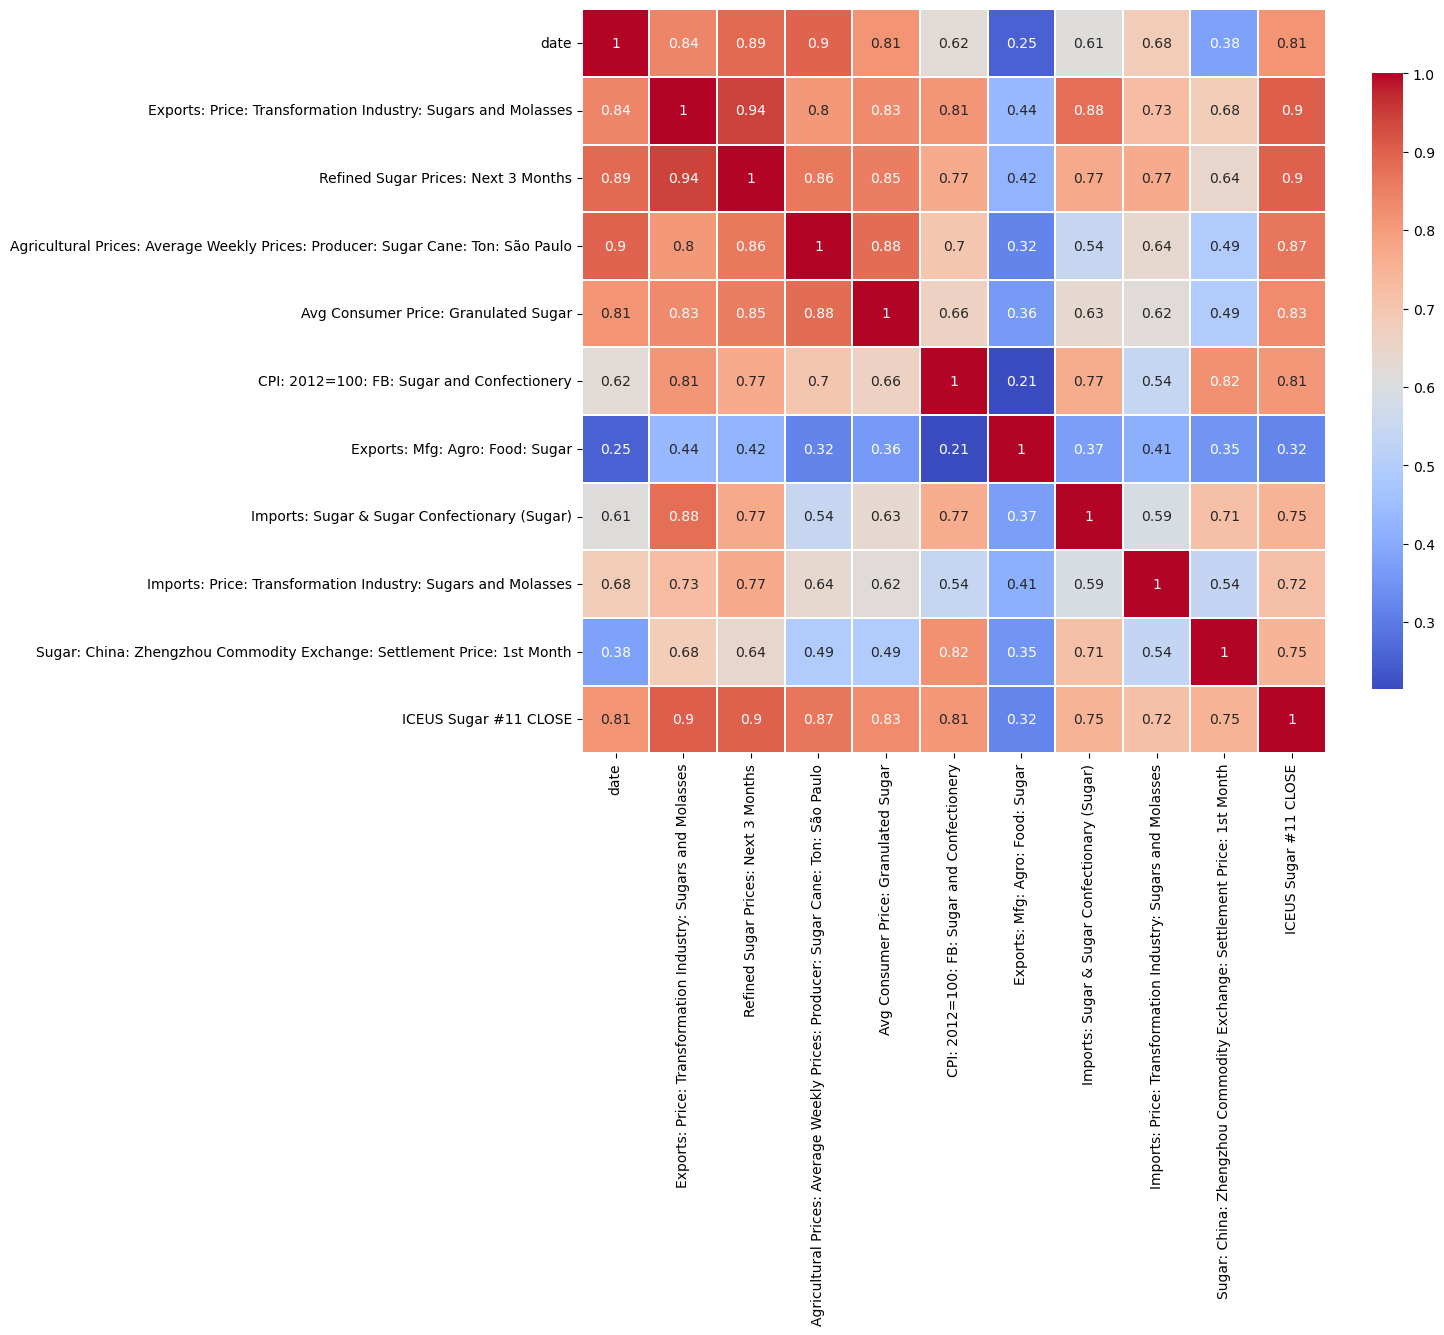

In [53]:
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix3, annot=True, cmap='coolwarm',linewidths=0.1, square=True, cbar_kws={"shrink": .8})

In [54]:
sq_corr3=correlation_matrix3.iloc[-1]**2
average_corr3=sq_corr3.mean()
average_corr3

0.6472487353670133

If we backward fill and then also forward fill: 

In [55]:
# ceic_backward_forward_filled=ceic_backward_filled.ffill()
# ceic_backward_forward_filled.dropna()
# correlation_matrix4=ceic_backward_forward_filled.corr()

In [56]:
# plt.figure(figsize=(12,10))
# sns.heatmap(correlation_matrix4, annot=True, cmap='coolwarm',linewidths=0.1, square=True, cbar_kws={"shrink": .8})

In [57]:
# sq_corr4=correlation_matrix4.iloc[-1]**2
# average_corr4=sq_corr4.mean()
# average_corr4

If fill all NaN values with the averages of their columns

In [58]:
# column_means=ceic.mean()
# ceic_average_filled=ceic.fillna(column_means)
# ceic_average_filled.dropna()
# correlation_matrix5=ceic_average_filled.corr()

In [59]:
# plt.figure(figsize=(12,10))
# sns.heatmap(correlation_matrix5, annot=True, cmap='coolwarm',linewidths=0.1, square=True, cbar_kws={"shrink": .8})

In [60]:
# sq_corr5=correlation_matrix5.iloc[-1]**2
# average_corr5=sq_corr5.mean()
# average_corr5

If we use linear interpolation:

In [61]:
# ceic_interpolated=ceic.interpolate(method='linear')
# ceic_interpolated.dropna()
# correlation_matrix6=ceic_interpolated.corr()

In [62]:
# plt.figure(figsize=(12,10))
# sns.heatmap(correlation_matrix6, annot=True, cmap='coolwarm',linewidths=0.1, square=True, cbar_kws={"shrink": .8})

In [63]:
# sq_corr6=correlation_matrix6.iloc[-1]**2
# average_corr6=sq_corr6.mean()
# average_corr6

If we use time interpolation: 

In [64]:
# ceic_interpolated2=ceic.interpolate(method='time')
# ceic_interpolated2.dropna()
# correlation_matrix7=ceic_interpolated2.corr()

In [65]:
# plt.figure(figsize=(12,10))
# sns.heatmap(correlation_matrix7, annot=True, cmap='coolwarm',linewidths=0.1, square=True, cbar_kws={"shrink": .8})

In [66]:
# sq_corr7=correlation_matrix7.iloc[-1]**2
# average_corr7=sq_corr7.mean()
# average_corr7

If we use nearest value interpolation:

In [67]:
# ceic_interpolated3=ceic.interpolate(method='nearest')
# ceic_interpolated3.dropna()
# correlation_matrix8=ceic_interpolated3.corr()

In [68]:
# plt.figure(figsize=(12,10))
# sns.heatmap(correlation_matrix8, annot=True, cmap='coolwarm',linewidths=0.1, square=True, cbar_kws={"shrink": .8})

In [69]:
# sq_corr8=correlation_matrix8.iloc[-1]**2
# average_corr8=sq_corr8.mean()
# average_corr8

In [70]:
cc=cc.drop(columns=['ICEUS Sugar #11 CLOSE'])

In [71]:
cc

,Ethanol US,USD/INR exchange rate,Ethanol Europe,Federal funds rate,CBOE Volatility Index (VIX) CLOSE,India Inflation data Core CPI,USD / Brazilian Real Rate
date,,,,,,,
2023-03-21,0.60,82.68,0.84,4.58,21.38,6.44,5.24
2023-03-24,0.62,82.35,0.84,4.83,21.74,6.44,5.25
2023-03-27,0.62,82.35,0.83,4.83,20.60,6.44,5.20
2023-03-28,0.62,82.16,0.83,4.83,19.97,6.44,5.17
2023-03-29,0.61,82.24,0.84,4.83,19.12,6.44,5.14
...,...,...,...,...,...,...,...
2024-06-08,0.52,83.52,0.72,5.33,12.22,4.83,5.34
2024-06-09,0.52,83.52,0.72,5.33,12.22,4.83,5.34
2024-06-10,0.51,83.52,0.73,5.33,12.74,4.83,5.35


In [72]:
df=pd.merge(cc, ceic_backward_filled, on='date')

In [73]:
df.tail(30)

,date,Ethanol US,USD/INR exchange rate,Ethanol Europe,Federal funds rate,CBOE Volatility Index (VIX) CLOSE,India Inflation data Core CPI,USD / Brazilian Real Rate,Exports: Price: Transformation Industry: Sugars and Molasses,Refined Sugar Prices: Next 3 Months,Agricultural Prices: Average Weekly Prices: Producer: Sugar Cane: Ton: São Paulo,Avg Consumer Price: Granulated Sugar,CPI: 2012=100: FB: Sugar and Confectionery,Exports: Mfg: Agro: Food: Sugar,Imports: Sugar & Sugar Confectionary (Sugar),Imports: Price: Transformation Industry: Sugars and Molasses,Sugar: China: Zhengzhou Commodity Exchange: Settlement Price: 1st Month,ICEUS Sugar #11 CLOSE
227,2024-02-19,0.43,83.02,0.63,5.33,14.71,5.10,4.96,521.564800,621.83,148.15,72.24,128.7,375.59,164.963,1116.779696,6514.0,23.08
228,2024-02-20,0.43,82.89,0.63,5.33,15.42,5.10,4.93,521.564800,621.83,148.15,72.24,128.7,375.59,164.963,1116.779696,6445.0,22.75
229,2024-02-21,0.43,82.93,0.62,5.33,15.34,5.10,4.94,521.564800,621.83,148.15,72.24,128.7,375.59,164.963,1116.779696,6392.0,22.77
230,2024-02-22,0.41,82.86,0.63,5.33,14.54,5.10,4.96,521.564800,621.83,148.15,72.24,128.7,375.59,164.963,1116.779696,6393.0,22.83
231,2024-02-23,0.41,82.88,0.63,5.33,13.79,5.10,4.99,521.564800,621.83,148.15,72.24,128.7,375.59,164.963,1116.779696,6339.0,22.62
232,2024-02-26,0.41,82.88,0.63,5.33,13.74,5.10,4.98,523.771293,621.83,146.20,72.24,128.7,375.59,164.963,1175.484339,6290.0,23.15
233,2024-02-27,0.41,82.91,0.63,5.33,13.43,5.10,4.93,523.771293,621.83,146.20,72.24,128.7,375.59,164.963,1175.484339,6291.0,23.84
234,2024-02-28,0.41,82.91,0.64,5.33,13.43,5.10,4.93,523.771293,621.83,146.20,72.24,128.7,375.59,164.963,1175.484339,6323.0,23.84
235,2024-02-29,0.41,82.90,0.63,5.33,13.40,5.10,4.97,523.771293,621.83,146.20,72.24,128.7,375.59,164.963,1175.484339,6321.0,22.58
236,2024-03-01,0.41,82.84,0.66,5.33,13.11,5.10,4.96,516.659187,621.83,146.20,72.24,128.7,375.59,164.963,1072.559289,6269.0,22.58


In [74]:
df=df.set_index('date')

In [75]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import *
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.metrics import *
from keras.preprocessing.sequence import TimeseriesGenerator

In [76]:
minmax_scaler=MinMaxScaler()
df_scaled = minmax_scaler.fit_transform(df)

In [77]:
features=df_scaled
target=df_scaled[:, -1]

In [78]:
TimeseriesGenerator(features, target, length=14, sampling_rate=1, batch_size=32)

In [79]:
X_train, y_train = features[:188], target[:188]
X_test, y_test = features[188:236], target[188:236]

In [80]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((188, 17), (188,), (48, 17), (48,))

In [81]:
window=14
batch_size=32
num_features= 17
train_generator = TimeseriesGenerator(X_train, y_train, length=window, sampling_rate=1, batch_size=batch_size)
test_generator = TimeseriesGenerator(X_test, y_test, length=window, sampling_rate=1, batch_size=batch_size)

In [82]:
model=Sequential()
model.add(LSTM(64, activation='relu', input_shape=(window, num_features), return_sequences=True))
model.add(LeakyReLU(alpha=0.5))
model.add(LSTM(64, activation='relu', return_sequences=False))
model.add(LeakyReLU(alpha=0.5))
model.add(Dropout(0.2))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 14, 128)           74752     
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 14, 128)           0         
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 128)               0         
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 206,465
Trainable params: 206,465
Non-trai

In [83]:
early_stopping = EarlyStopping(monitor = 'val_loss', patience=2, mode='min')
model.compile(loss=MeanSquaredError(), optimizer=Adam(), metrics='mse')

In [84]:
history = model.fit(train_generator, epochs=50, validation_data=test_generator, shuffle=False, callbacks=[early_stopping])

Epoch 1/50
6/6 [==============================] - 3s 122ms/step - loss: 0.1393 - mse: 0.1393 - val_loss: 0.1911 - val_mse: 0.1911
Epoch 2/50
6/6 [==============================] - 0s 62ms/step - loss: 0.0598 - mse: 0.0598 - val_loss: 0.0115 - val_mse: 0.0115
Epoch 3/50
6/6 [==============================] - 0s 43ms/step - loss: 0.0557 - mse: 0.0557 - val_loss: 0.0126 - val_mse: 0.0126
Epoch 4/50
6/6 [==============================] - 0s 69ms/step - loss: 0.0295 - mse: 0.0295 - val_loss: 0.0405 - val_mse: 0.0405


In [85]:
model.evaluate(test_generator, verbose=0)

[0.04048416018486023, 0.04048416018486023]

In [98]:
predictions = model.predict(test_generator)

2/2 [==============================] - 0s 21ms/step


In [102]:
pred_repeat = np.repeat(predictions, num_features, axis=-1)
final_pred = minmax_scaler.inverse_transform(pred_repeat)[:, -1]

In [103]:
test_repeat = np.repeat(y_test.reshape(-1, 1), num_features, axis=-1)
final_test = minmax_scaler.inverse_transform(test_repeat)[:, -1]

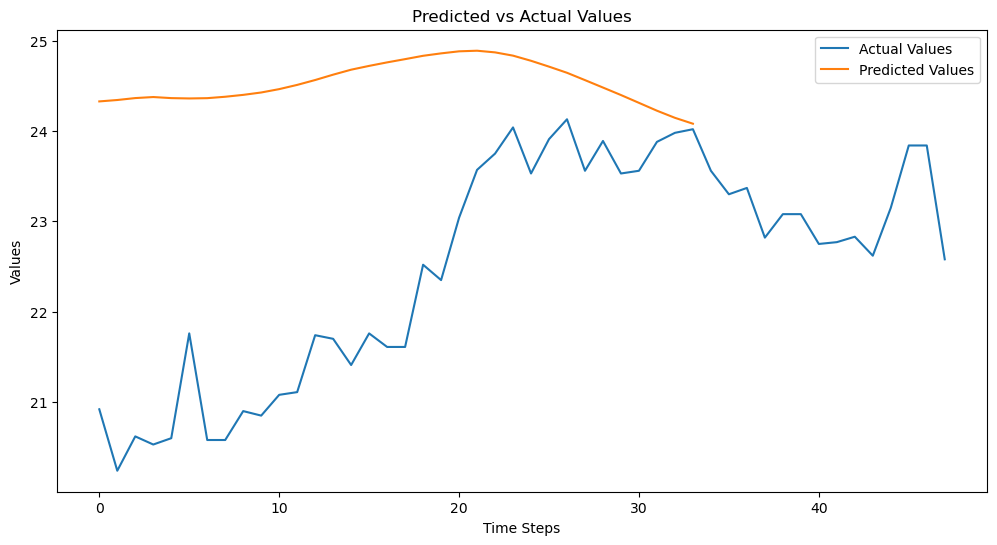

In [104]:
# Plotting the graph
plt.figure(figsize=(12, 6))
plt.plot(final_test, label='Actual Values')
plt.plot(final_pred, label='Predicted Values')
plt.title('Predicted vs Actual Values')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.legend()
plt.show()